# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name:Habtom Woldu
# GitHub Repository : https://github.com/Habtom1999/web-scraping.git

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

In [130]:

# Create and activate a Python virtual environment. 
# Before starting the project, try all these imports FIRST
# Address any errors you get running this code cell 
# by installing the necessary packages into your active Python environment.
# Try to resolve issues using your materials and the web.
# If that doesn't work, ask for help in the discussion forums.
# You can't complete the exercises until you import these - start early! 
# We also import pickle and Counter (included in the Python Standard Library).

from collections import Counter
import pickle
import requests
import spacy
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

!pip list

print('All prereqs installed.')

Package             Version
------------------- -----------
annotated-types     0.6.0
asttokens           2.4.1
beautifulsoup4      4.12.3
blis                0.7.11
catalogue           2.0.10
certifi             2024.2.2
charset-normalizer  3.3.2
click               8.1.7
cloudpathlib        0.16.0
colorama            0.4.6
comm                0.2.2
confection          0.1.4
contourpy           1.2.1
cycler              0.12.1
cymem               2.0.8
debugpy             1.8.1
decorator           5.1.1
en-core-web-sm      3.7.1
exceptiongroup      1.2.0
executing           2.0.1
fonttools           4.50.0
html5lib            1.1
idna                3.6
importlib_metadata  7.1.0
importlib_resources 6.4.0
ipykernel           6.29.4
ipython             8.18.1
jedi                0.19.1
Jinja2              3.1.3
joblib              1.3.2
jupyter_client      8.6.1
jupyter_core        5.7.2
kiwisolver          1.4.5
langcodes           3.3.0
MarkupSafe          2.1.5
matplotlib          3.

1. Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

In [131]:
import requests
from bs4 import BeautifulSoup
import pickle

# URL of the webpage
url = "https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/"

# Fetch the webpage content
response = requests.get(url)
article_page = requests.get(url)
article_html= article_page.text
# Parse the HTML content
soup = BeautifulSoup(response.content, 'html.parser')

# Find the article content
article_content = soup.find('article').prettify()

# Dump the article content to a .pkl file
with open('python-match.pkl', 'wb') as f:
    pickle.dump(article_page, f)

with open('python-match.pkl', 'rb') as f:
    htmldoc = pickle.load(f)
print("Article content dumped to article_content.pkl")


Article content dumped to article_content.pkl


2. Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

In [132]:
import pickle
import requests
from bs4 import BeautifulSoup

# URL of the webpage
url ="https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/"

# Fetch the webpage content
article_page = requests.get(url)
article_html = article_page.text

# Dump the article content to a .pkl file
with open('python_match.pkl', 'wb') as f:
    pickle.dump(article_html, f)

# Load the article content from the .pkl file
with open('python_match.pkl', 'rb') as f:
    article_content = pickle.load(f)

# Create a BeautifulSoup object to parse the HTML content
soup = BeautifulSoup(article_content, 'html.parser')

# Find the article element and print its text
article_element = soup.find('article')
if article_element:
    print(article_element.get_text())
else:
    print("Article element not found.")

    









How Laser Headlights Work


                130 Comments            

by:
Lewin Day



March 22, 2021








When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!

Laser Headlights?!
BWM’s prototype laser headlight assemblies undergoing testing.
The first image brought to mind by the phrase “laser headlights” is that of laser beams firing out the front of an automobile. Obviously, coherent beams of monochromatic light would make for poor illumination outside o

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [133]:

import spacy
from collections import Counter
from spacytextblob.spacytextblob import SpacyTextBlob

nlp = spacy.load("en_core_web_sm")
# adding sentiment analysis
doc = nlp(article_element.get_text())
non_ws_tokens = []
for token in doc:
    if not token.is_space:
        non_ws_tokens.append(token)
# Print (non_ws_tokens)
def we_care_about(token):
    return not (token.is_space or token.is_punct or token.is_stop)
interesting_tokens = [token for token in doc if we_care_about(token)]
print(interesting_tokens)
word_freq = Counter(map(str,interesting_tokens))
# Print (word_freq.most_commen(5))
interesting_lemmas = [token.lemma_ for token in doc if we_care_about(token)]
lemma_freq = Counter(interesting_lemmas)
print(lemma_freq.most_common(5))





[Laser, Headlights, Work, 130, Comments, Lewin, Day, March, 22, 2021, think, onward, march, automotive, technology, headlights, usually, thing, come, mind, Engines, fuel, efficiency, switch, electric, power, mind, mean, thousands, engineers, world, working, improve, state, art, automotive, lighting, day, day, Sealed, beam, headlights, gave, way, modern, designs, regulations, loosened, bulbs, moved, simple, halogens, xenon, HIDs, recently, LEDs, new, technology, scene, lasers, Laser, Headlights, BWM, prototype, laser, headlight, assemblies, undergoing, testing, image, brought, mind, phrase, laser, headlights, laser, beams, firing, automobile, Obviously, coherent, beams, monochromatic, light, poor, illumination, outside, specific, spot, distance, away, Thankfully, eyes, laser, headlights, work, way, Instead, laser, headlights, consist, solid, state, laser, diodes, mounted, inside, headlight, blue, lasers, fired, yellow, phosphor, similar, white, LEDs, produces, powerful, vibrant, white, 

4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [134]:
import spacy
from collections import Counter
from spacy.lang.en.stop_words import STOP_WORDS

# Load the spaCy English language model
nlp = spacy.load("en_core_web_sm")

# Process the article text using the spaCy pipeline
doc = nlp(article_element.get_text())

# Define a function to filter out unwanted tokens
def we_care_about(token):
    return not (token.is_space or token.is_punct or token.is_stop)
interesting_tokens = [token for token in doc if we_care_about(token)]

# Extract the lemmas of interesting tokens and convert them to lowercase
interesting_lemmas = [token.lemma_.lower() for token in doc if we_care_about(token)]
# Count the requency of each lemmas
lemma_freq = Counter(interesting_lemmas)


# Store the 5 most commonw words in a set
cool_words = set()
for lemma, freq in lemma_freq.most_common(5):
    cool_words.add(lemma)
# Print (cool_words)
interesting_lemmas = [token.lemma_.lower() for token in doc if we_care_about(token)]
lemma_freq - Counter(interesting_lemmas)
print(lemma_freq.most_common(5))




[('laser', 40), ('headlight', 28), ('beam', 12), ('technology', 10), ('light', 10)]


5. Define the following methods:
    * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
    * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

In [135]:
# D# Define interesting tokens and lemmas
interesting_token = []
for token, freq in word_freq.most_common(5):
    interesting_token.append(token)
    
interesting_lemma = set()
for lemma, freq in lemma_freq.most_common(5):
    interesting_lemma.add(lemma)
    
# Extract sentences and their corresponding word counts
sentences = list(doc.sents)
stringlist = []
cool_words = []
for sentence in sentences:
    scount = 0
    sent_str = str(sentence).replace('\n', ' ').replace(' ', ' ')
    stringlist.append(sent_str)
    for token in sentence:
        if not (token.is_space or token.is_punct):
            scount += 1
    cool_words.append(scount)
    
# Define functions to score sentences by token and lemma
def score_sentence_by_token(sentence, interesting_token):
    tcount = 0
    for token in sentence:
        if token.text.lower() in interesting_token:
            tcount += 1
    if tcount == 0:
        print('No interesting tokens')
    tscore = tcount / cool_words[sentences.index(sentence)]  # Use the index of the sentence
    print('sentence:', stringlist[sentences.index(sentence)], 'tokens:', tcount, 'words:', cool_words[sentences.index(sentence)], 'score:', tscore)
    
def score_sentence_by_lemma(sentence, interesting_lemma):
    lcount = 0
    for token in sentence:
        if token.lemma_.lower() in interesting_lemma:
            lcount += 1
    if lcount == 0:
        print('No interesting lemmas')
    lscore = lcount / cool_words[sentences.index(sentence)]  # Use the index of the sentence
    print('sentence:', stringlist[sentences.index(sentence)], 'lemmas:', lcount, 'words:', cool_words[sentences.index(sentence)], 'score:', lscore)
            
# Call the scoring functions
score_sentence_by_token(sentences[1], interesting_token)
score_sentence_by_lemma(sentences[1], interesting_lemma)


sentence: When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. tokens: 2 words: 21 score: 0.09523809523809523
sentence: When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. lemmas: 2 words: 21 score: 0.09523809523809523


6. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

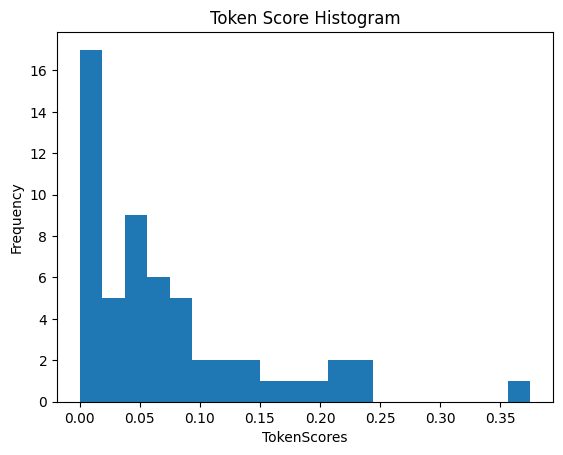

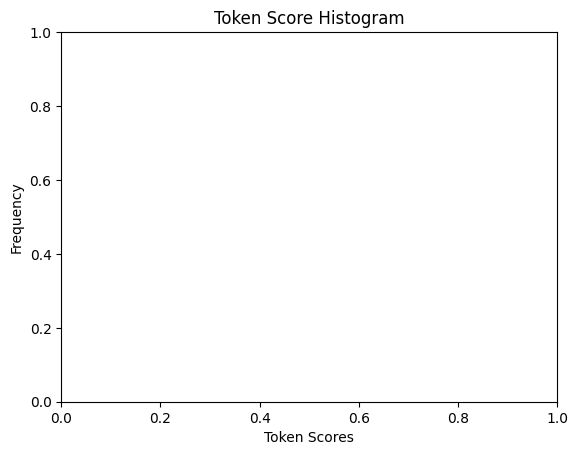

In [136]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
import pickle
from bs4 import BeautifulSoup
from collections import Counter
import numpy as np


# Load the pickled HTML content
with open('python_match.pkl', 'rb') as f:
    article_content = pickle.load(f)

# Create a BeautifulSoup object using the default parser
soup = BeautifulSoup(article_content, 'html.parser')

# Create a BeautifulSoup object using the default pars
article_element = soup.find('article')

# Load the spaCy English model
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')

# Process the text with spaCy
doc = nlp(article_element.get_text())

# Define a function to filter out unwanted tokens
def cool_words(token):
    return not (token.is_space or token.is_punct or token.is_stop)

# Get the most common tokens and lemmas
token_freq = Counter(map(str, interesting_tokens))
interesting_token = set()
for token, freq in token_freq.most_common(5):
    interesting_token.add(token)
interesting_lemmas = [token.lemma_.lower()for token in doc if cool_words(token)]
lemma_freq = Counter(interesting_lemmas)
interesting_lemmas = set()
for lemma, freq in lemma_freq.most_common(5):
    interesting_lemmas.add(lemma)

# Define a function to score sentences by token
def score_sentence_by_token(sentence, interesting_token):
    count = 0
    count2 = 1
    for token in sentence:
        if token.text.lower() in interesting_token:
            count += 1
        if not (token.is_space or token.is_punct):
            count2 += 1
    return count / count2

# file_path = file_path = r'C:\Users\habto\Desktop\NWMS classes\Wemining and NLP\Module 6\web-scraping\article_content.pkl'

def score_sentence_by_lemma(sentence1,interesting_lemmas):
    count = 0
    count2=1
    for token in sentence1 :
        if token.lemma_.lower()in interesting_lemmas:
            count+= 1
        if not (token.lemma.is_space or token.is_punct):
            count2 +=1
    return count/count2
            
# Calculate scores for each sentence
list_of_token_scores = []
sentence_numbers=[]
for i, sent in enumerate(doc.sents):
    list_of_token_scores.append(score_sentence_by_token(sent, interesting_token))
    sentence_numbers.append(i)

# Plot the histogram
fig, ax = plt.subplots()
ax.hist(list_of_token_scores, bins=20)
labels=ax.get_xticklabels()
ax.set(xlabel='TokenScores', ylabel='Frequency', title='Token Score Histogram')
plt.show()
# Adjust the number of bins as needed
plt.xlabel('Token Scores')
plt.ylabel('Frequency')
plt.title('Token Score Histogram')
plt.show()


7. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

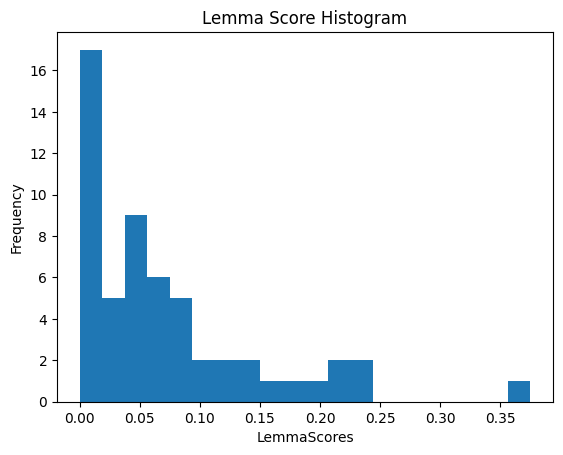

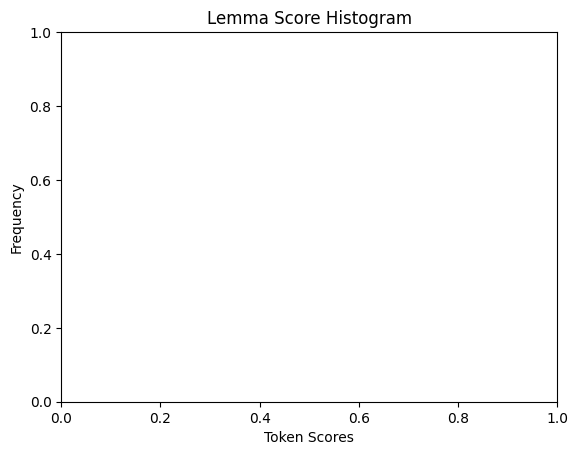

In [137]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
import pickle
from bs4 import BeautifulSoup
from collections import Counter
import numpy as np


# Load the pickled HTML content
with open('python_match.pkl', 'rb') as f:
    article_content = pickle.load(f)

# Create a BeautifulSoup object using the default parser
soup = BeautifulSoup(article_content, 'html.parser')

# Create a BeautifulSoup object using the default pars
article_element = soup.find('article')

# Load the spaCy English model
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')

# Process the text with spaCy
doc = nlp(article_element.get_text())

# Define a function to filter out unwanted tokens
def cool_words(token):
    return not (token.is_space or token.is_punct or token.is_stop)

# Get the most common tokens and lemmas
token_freq = Counter(map(str, interesting_tokens))
interesting_token = set()
for token, freq in token_freq.most_common(5):
    interesting_token.add(token)
interesting_lemmas = [token.lemma_.lower()for token in doc if cool_words(token)]
lemma_freq = Counter(interesting_lemmas)
interesting_lemmas = set()
for lemma, freq in lemma_freq.most_common(5):
    interesting_lemmas.add(lemma)

# Define a function to score sentences by token
def score_sentence_by_token(sentence1, interesting_token):
    count = 0
    count2 = 1
    for token in sentence1:
        if token.text.lower() in interesting_token:
            count += 1
    for token in sentence1:
        if not (token.is_space or token.is_punct):
            count2 += 1
    return count / count2

# file_path = file_path = r'C:\Users\habto\Desktop\NWMS classes\Wemining and NLP\Module 6\web-scraping\article_content.pkl'

def score_sentence_by_lemma(sentence1,interesting_lemmas):
    count = 0
    count2=1
    for token in sentence1 :
        if token.lemma_.lower()in interesting_lemmas:
            count+= 1
        if not (token.lemma.is_space or token.is_punct):
            count2 +=1
    return count/count2
            
# Calculate scores for each sentence
list_of_lemma_scores = []
sentence_numbers=[]
for i, sent in enumerate(doc.sents):
    list_of_lemma_scores.append(score_sentence_by_token(sent, interesting_token))
    sentence_numbers.append(i)

# Plot the histogram
fig, ax = plt.subplots()
ax.hist(list_of_token_scores, bins=20)
labels=ax.get_xticklabels()
ax.set(xlabel='LemmaScores', ylabel='Frequency', title='Lemma Score Histogram')
plt.show()
# Adjust the number of bins as needed
plt.xlabel('Token Scores')
plt.ylabel('Frequency')
plt.title('Lemma Score Histogram')
plt.show()


8. Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).

All the words in questions 3 and 4 are all nouns so the list will not change. We can use spacy text.pos and and create if statment that checks text.pos == noun. We can add this condition to the cool_words and capture only the nouns

In [138]:
# Load the pickled HTML content
with open('python_match.pkl', 'rb') as f:
    article_content = pickle.load(f)

# Create a BeautifulSoup object using the default parser
soup = BeautifulSoup(article_content, 'html.parser')

# Create a BeautifulSoup object using the default pars
article_element = soup.find('article')

# Load the spaCy English model
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')

# Process the text with spaCy
doc = nlp(article_element.get_text())


def cool_words(token):
    return not (token.is_space or token.is_punct or token.is_stop)
interesting_lemmas=[token.lemma_.lower() for token in doc if cool_words(token) and token.pos_=="NOUN"]
lemma_freq = Counter(interesting_lemmas)
print(lemma_freq.most_common(5))

[('laser', 35), ('headlight', 22), ('beam', 12), ('technology', 10), ('led', 6)]
